<a href="https://colab.research.google.com/github/bala-baskar/aiml_tech_courses/blob/main/pytorch/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch workflow

1. Data prepare and load
2. Build model
3. Fitting the model to data (training)
4. Making predictions and evaluating the model (inference)
5. Saving and loading a model
6. Collate all together

In [110]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu121


In [111]:
weight = 0.5
bias = 0.2

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.2000],
         [0.2100],
         [

In [112]:
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

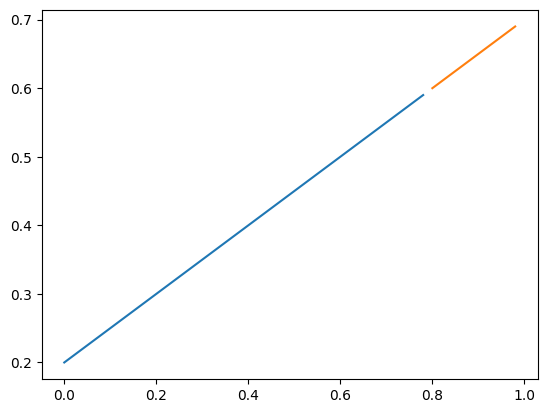

In [113]:
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)

In [114]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [115]:
# Initialize the model object
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(model_0)
print(list(model_0.parameters()))
print(model_0.state_dict())

LinearRegressionModel()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [116]:
# Prediction
with torch.inference_mode():
  y_pred = model_0(X_test)

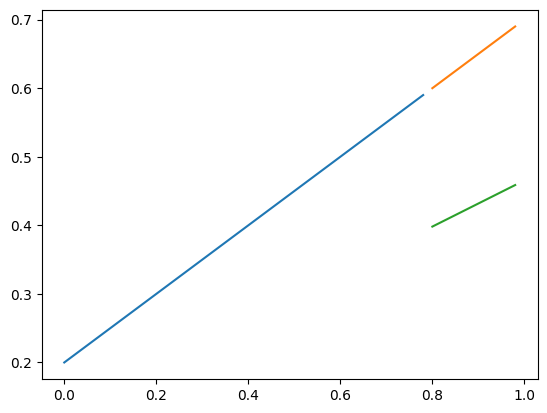

In [117]:
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
plt.plot(X_test,y_pred)

In [118]:
# Model training
# Setup a loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)

In [119]:
# Model training loop

epochs = 200

epoch_values = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  # Training
  model_0.train() # model in training mode
  y_pred = model_0(X_train) # call forward() function
  loss = loss_fn(y_pred,y_train) # forward pass
  #print(loss)
  optimizer.zero_grad() # optimizer sets the grad to 0 before updation
  loss.backward() # backpropagation
  optimizer.step() # calculates the step to update the parameters

  #Testing
  model_0.eval() # test the model
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch {epoch}: Loss {loss} : Test Loss {test_loss}")
      epoch_values.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(model_0.state_dict())

Epoch 0: Loss 0.13488134741783142 : Test Loss 0.2030651569366455
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch 10: Loss 0.03132527321577072 : Test Loss 0.07949598133563995
OrderedDict([('weights', tensor([0.3789])), ('bias', tensor([0.2283]))])
Epoch 20: Loss 0.019853416830301285 : Test Loss 0.04678727313876152
OrderedDict([('weights', tensor([0.4027])), ('bias', tensor([0.2398]))])
Epoch 30: Loss 0.016392573714256287 : Test Loss 0.03782790154218674
OrderedDict([('weights', tensor([0.4201])), ('bias', tensor([0.2333]))])
Epoch 40: Loss 0.012963002547621727 : Test Loss 0.029555415734648705
OrderedDict([('weights', tensor([0.4372])), ('bias', tensor([0.2263]))])
Epoch 50: Loss 0.009524193592369556 : Test Loss 0.021282946690917015
OrderedDict([('weights', tensor([0.4544])), ('bias', tensor([0.2193]))])
Epoch 60: Loss 0.006090622395277023 : Test Loss 0.01369735598564148
OrderedDict([('weights', tensor([0.4713])), ('bias', tensor([0.2118]))])
Epoch 70: Loss 

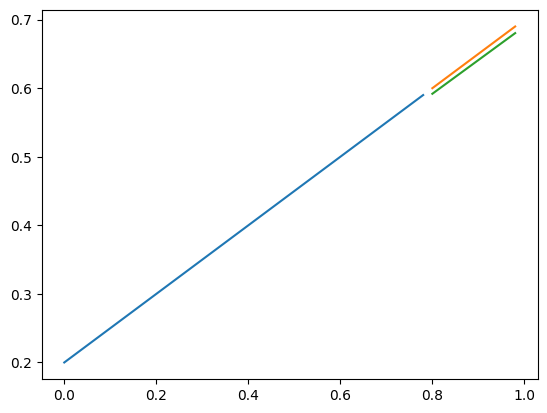

In [120]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
plt.plot(X_test,y_pred_new)

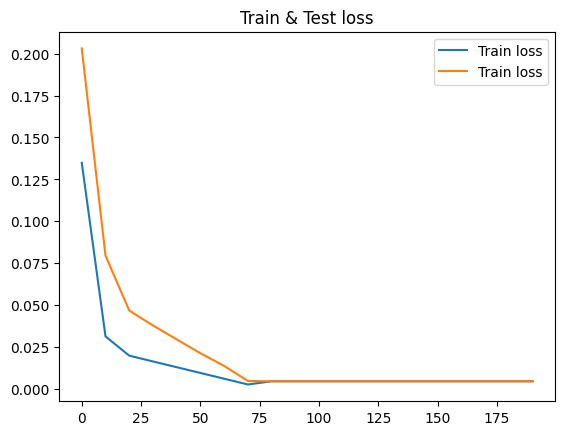

In [121]:
plt.plot(epoch_values,torch.tensor(loss_values).numpy(),label="Train loss")
plt.plot(epoch_values,torch.tensor(test_loss_values).numpy(),label="Train loss")
plt.title("Train & Test loss")
plt.legend()

In [122]:
# Save the model
from pathlib import Path

# Create new directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "pytorch_workflow_model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print("Saving model to:",MODEL_SAVE_PATH)
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model1.pth


In [123]:
# Load the model
loaded_model_0 = LinearRegressionModel()
print(loaded_model_0.state_dict())

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])
OrderedDict([('weights', tensor([0.4913])), ('bias', tensor([0.1988]))])


### Model module with Linear layer

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [138]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [2]:
# Changing runtime from CPU to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Data
weights = 0.7
bias = 0.1

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weights * X + bias

In [4]:
split_idx = int(X.shape[0]*0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

In [5]:
X_train.to(device)
y_train.to(device)
X_test.to(device)
y_test.to(device)

tensor([[0.6600],
        [0.6740],
        [0.6880],
        [0.7020],
        [0.7160],
        [0.7300],
        [0.7440],
        [0.7580],
        [0.7720],
        [0.7860]], device='cuda:0')

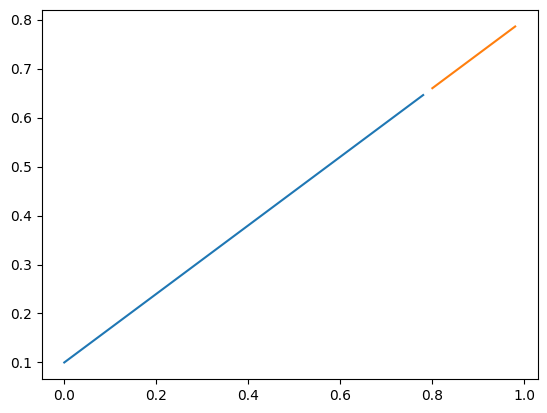

In [6]:
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)

In [7]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=float,
                                            requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=float,
                                         requires_grad=True))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [8]:
class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [9]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1.state_dict())

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.02)

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [10]:
epochs = 200
epoch_val = []
loss_val = []
test_loss_val = []

for epoch in range(epochs):

  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_pred_n = model_1(X_test)
    test_loss = loss_fn(y_pred_n,y_test)
    if epoch % 10 == 0:
      print(f"Epoch {epoch} - Loss {loss} - Test loss {test_loss}")
      print(model_1.state_dict())
      epoch_val.append(epoch)
      loss_val.append(loss)
      test_loss_val.append(test_loss)

Epoch 0 - Loss 0.7551778554916382 - Test loss 0.760505199432373
OrderedDict([('linear_layer.weight', tensor([[0.7567]])), ('linear_layer.bias', tensor([0.8100]))])
Epoch 10 - Loss 0.5247582197189331 - Test loss 0.4910855293273926
OrderedDict([('linear_layer.weight', tensor([[0.6787]])), ('linear_layer.bias', tensor([0.6100]))])
Epoch 20 - Loss 0.29433831572532654 - Test loss 0.22166574001312256
OrderedDict([('linear_layer.weight', tensor([[0.6007]])), ('linear_layer.bias', tensor([0.4100]))])
Epoch 30 - Loss 0.06402688473463058 - Test loss 0.0460599884390831
OrderedDict([('linear_layer.weight', tensor([[0.5235]])), ('linear_layer.bias', tensor([0.2110]))])
Epoch 40 - Loss 0.03227909654378891 - Test loss 0.07377608120441437
OrderedDict([('linear_layer.weight', tensor([[0.5429]])), ('linear_layer.bias', tensor([0.1660]))])
Epoch 50 - Loss 0.025391723960638046 - Test loss 0.05723118782043457
OrderedDict([('linear_layer.weight', tensor([[0.5773]])), ('linear_layer.bias', tensor([0.1520]))]

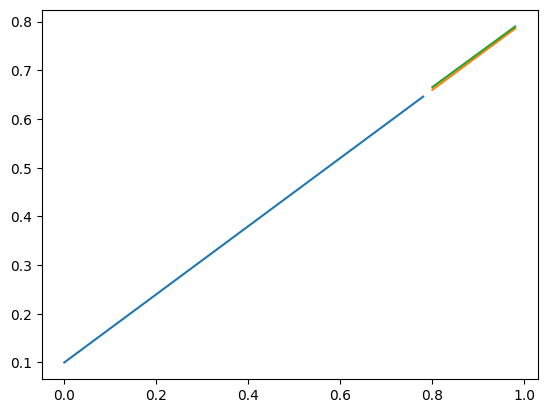

In [11]:
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
plt.plot(X_test,y_pred_n)

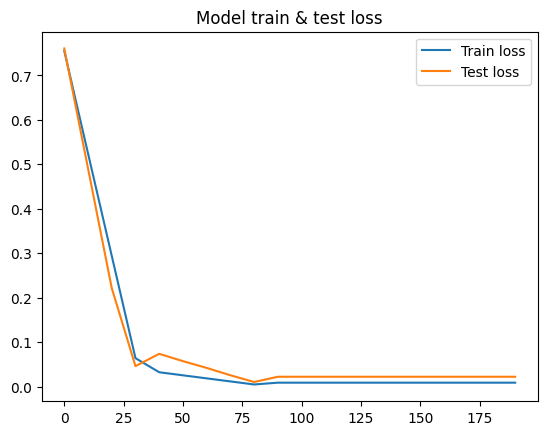

In [12]:
plt.plot(epoch_val,torch.tensor(loss_val).numpy(), label="Train loss")
plt.plot(epoch_val,torch.tensor(test_loss_val).numpy(), label="Test loss")
plt.title("Model train & test loss")
plt.legend()

In [14]:
!mkdir models
torch.save(obj=model_1.state_dict(),
           f="models/pytorch_model_1.pth")

In [15]:
load_model_1 = LinearRegressionModelV2()
print(load_model_1.state_dict())
load_model_1.load_state_dict(torch.load("models/pytorch_model_1.pth"))
print(load_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])), ('linear_layer.bias', tensor([0.9186]))])
OrderedDict([('linear_layer.weight', tensor([[0.6919]])), ('linear_layer.bias', tensor([0.1120]))])
